# Predicting Car Prices

## Project Goal

Determine best combination of car features that yield best predictive model for car prices based on the data file provided.

In [1]:
import pandas as pd
import numpy as np
import random
from numpy.random import seed, randint
from IPython.display import HTML
from IPython.display import display, Markdown
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

cars = pd.read_csv('imports-85.data')
cars.columns = 'symboling,normalized_losses,make,fuel_type,aspiration,\
num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,\
width,height,curb_weight,engine_type,num_of_cylinders,engine_size,\
fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,\
city_mpg,highway_mpg,price'.split(',')

print(cars.head(), '\n')
print(cars.info())

cars.to_csv('file2.csv', header=False, index=False)

   symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1    hatchback          rwd           front        94.5  ...          152   
2        sedan          fwd           front        99.8  ...          109   
3        sedan          4wd           front        99.4  ...          136   
4        sedan          fwd           front        99.8  ...          136   

   fuel_system  bore  stroke compression_ratio hor

In [2]:
cars_df = cars.replace('?', np.NaN)
print(cars_df.head())

cars_df.isna().sum()

   symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          1               NaN  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2               NaN         audi       gas        std          two   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1    hatchback          rwd           front        94.5  ...          152   
2        sedan          fwd           front        99.8  ...          109   
3        sedan          4wd           front        99.4  ...          136   
4        sedan          fwd           front        99.8  ...          136   

   fuel_system  bore  stroke compression_ratio hor

symboling             0
normalized_losses    40
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

## Observations and Action

“Normalized-losses” is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door, small, station wagons, sports/specialty, etc…), and represents the average loss per car per year.

Based on the definition above for 'normalized-losses', I really don't think it would be a 'great loss' if I remove it from the dataframe, expecially since there are 40 missing values out of a possible 204. That's almost 20% !!

Also, in order to execute the project goal, I think it's important to have equal number of rows with non-null values across the dataframe. Ny removing rows, we have lost 12 rows out of 204 or about 6% of the data in some rows. It is what it is.

In [3]:
cars_df = cars_df.drop(['normalized_losses'], axis=1)
print(cars_df.info())
cars_df = cars_df.dropna()
print(cars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   make               204 non-null    object 
 2   fuel_type          204 non-null    object 
 3   aspiration         204 non-null    object 
 4   num_of_doors       202 non-null    object 
 5   body_style         204 non-null    object 
 6   drive_wheels       204 non-null    object 
 7   engine_location    204 non-null    object 
 8   wheel_base         204 non-null    float64
 9   length             204 non-null    float64
 10  width              204 non-null    float64
 11  height             204 non-null    float64
 12  curb_weight        204 non-null    int64  
 13  engine_type        204 non-null    object 
 14  num_of_cylinders   204 non-null    object 
 15  engine_size        204 non-null    int64  
 16  fuel_system        204 non

In [4]:
cars_df = cars_df.astype({col: 'int32' for col in cars_df.select_dtypes('int64').columns})
cars_df['bore'] = pd.to_numeric(cars_df['bore'])
cars_df['stroke'] = pd.to_numeric(cars_df['stroke'])
cars_df['horsepower'] = cars_df['horsepower'].astype(str).astype(int)
cars_df['peak_rpm'] = cars_df['peak_rpm'].astype(str).astype(int)
cars_df['price'] = cars_df['price'].astype(str).astype(int)

print(cars_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 203
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          192 non-null    int32  
 1   make               192 non-null    object 
 2   fuel_type          192 non-null    object 
 3   aspiration         192 non-null    object 
 4   num_of_doors       192 non-null    object 
 5   body_style         192 non-null    object 
 6   drive_wheels       192 non-null    object 
 7   engine_location    192 non-null    object 
 8   wheel_base         192 non-null    float64
 9   length             192 non-null    float64
 10  width              192 non-null    float64
 11  height             192 non-null    float64
 12  curb_weight        192 non-null    int32  
 13  engine_type        192 non-null    object 
 14  num_of_cylinders   192 non-null    object 
 15  engine_size        192 non-null    int32  
 16  fuel_system        192 non

In [5]:
cars_features = cars_df.filter(['symboling', 'wheel_base', 'length', \
            'width', 'height', 'curb_weight', \
            'engine_size', 'bore', 'stroke', \
            'compression_ratio', 'horsepower', \
            'peak_rpm', 'city_mpg', 'highway_mpg'], axis=1)
print(cars_features.info())
price_col = cars_df['price']
normalized_cars = (cars_features - cars_features.mean()) / (cars_features.std())
normalized_cars['price'] = price_col
display(normalized_cars.iloc[:, 0:8])
display(normalized_cars.iloc[:, 8:15])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 203
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          192 non-null    int32  
 1   wheel_base         192 non-null    float64
 2   length             192 non-null    float64
 3   width              192 non-null    float64
 4   height             192 non-null    float64
 5   curb_weight        192 non-null    int32  
 6   engine_size        192 non-null    int32  
 7   bore               192 non-null    float64
 8   stroke             192 non-null    float64
 9   compression_ratio  192 non-null    float64
 10  horsepower         192 non-null    int32  
 11  peak_rpm           192 non-null    int32  
 12  city_mpg           192 non-null    int32  
 13  highway_mpg        192 non-null    int32  
dtypes: float64(7), int32(7)
memory usage: 17.2 KB
None


,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore
0,1.801871,-1.694895,-0.444246,-0.842806,-2.147920,-0.025712,0.045215,0.513372
1,0.173828,-0.731293,-0.252320,-0.188426,-0.630656,0.495046,0.572806,-2.381361
2,0.987849,0.134316,0.179515,0.138764,0.170121,-0.425276,-0.458395,-0.512609
3,0.987849,0.068987,0.179515,0.232246,0.170121,0.496939,0.189103,-0.512609
4,0.987849,0.134316,0.235493,0.185505,-0.335633,-0.103353,0.189103,-0.512609
...,...,...,...,...,...,...,...,...
199,-1.454216,1.653214,1.155141,1.400782,0.675876,0.739329,0.309010,1.649280
200,-1.454216,1.653214,1.155141,1.354040,0.675876,0.923014,0.309010,1.649280
201,-1.454216,1.653214,1.155141,1.400782,0.675876,0.852949,1.076416,0.916436
202,-1.454216,1.653214,1.155141,1.400782,0.675876,1.241150,0.404936,-1.172168


,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,-1.823756,-0.288331,0.198586,-0.213382,-0.679861,-0.557501,16500
1,0.695848,-0.288331,1.328517,-0.213382,-0.992516,-0.703931,16500
2,0.472592,-0.037518,-0.037911,0.850756,-0.210879,-0.118212,13950
3,0.472592,-0.539145,0.303696,0.850756,-1.148843,-1.289651,17450
4,0.472592,-0.413738,0.172309,0.850756,-0.992516,-0.850361,15250
...,...,...,...,...,...,...,...
199,-0.324751,-0.162924,0.277419,0.637928,-0.367206,-0.411071,16845
200,-0.324751,-0.363575,1.486181,0.425101,-0.992516,-0.850361,19045
201,-1.217775,-0.338494,0.802968,0.850756,-1.148843,-1.143221,21485
202,0.472592,3.223058,0.067199,-0.639037,0.101776,-0.557501,22470


In [6]:
def knn_train_test(train, target, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train_df = rand_df.iloc[0:97]
    test_df = rand_df.iloc[97:]
    train_features = train_df[[train]]
    # List-like object, containing just the target column, `price`.
    train_target = train_df[target]
    # Pass everything into the fit method.
    knn = KNeighborsRegressor()
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[[train]])
    mse = mean_squared_error(test_df[target], predictions)
    rmse = mse**0.5
    return rmse

rmse_results = {}
train_cols = normalized_cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_cars)
    rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()



engine_size          3101.790077
city_mpg             3699.634474
highway_mpg          4137.316221
width                4144.076385
curb_weight          4278.625365
horsepower           4592.573241
length               6092.444004
wheel_base           6312.705346
compression_ratio    6534.067795
bore                 7312.542643
height               8059.317561
stroke               8229.941135
peak_rpm             8436.050213
symboling            8482.037686
dtype: float64

In [7]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.

train_cols = normalized_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'symboling': {1: 9712.222351780085,
  3: 9104.928431326813,
  5: 8595.560053379304,
  7: 8237.909443645316,
  9: 8592.327955587674},
 'wheel_base': {1: 5711.007039590303,
  3: 5822.512616174331,
  5: 6209.8739122666575,
  7: 6479.346531735768,
  9: 6636.669589667136},
 'length': {1: 5830.919981729584,
  3: 6892.695478595304,
  5: 6085.422607140773,
  7: 5832.798119154264,
  9: 5629.985410982932},
 'width': {1: 5173.95086486945,
  3: 4780.948517486028,
  5: 4140.091668872402,
  7: 4479.167097761409,
  9: 4808.495956861703},
 'height': {1: 12289.87321817235,
  3: 8807.585384582597,
  5: 8132.904401590901,
  7: 8133.122414182737,
  9: 8142.350526558705},
 'curb_weight': {1: 5237.547676791751,
  3: 4480.940706692976,
  5: 4255.984699122715,
  7: 4633.617297647101,
  9: 4750.461543122435},
 'engine_size': {1: 3420.730582602202,
  3: 2712.124907928044,
  5: 2912.356482944696,
  7: 3398.006648906371,
  9: 3504.700623742741},
 'bore': {1: 7771.747522409831,
  3: 6978.511239704726,
  5: 7303.4

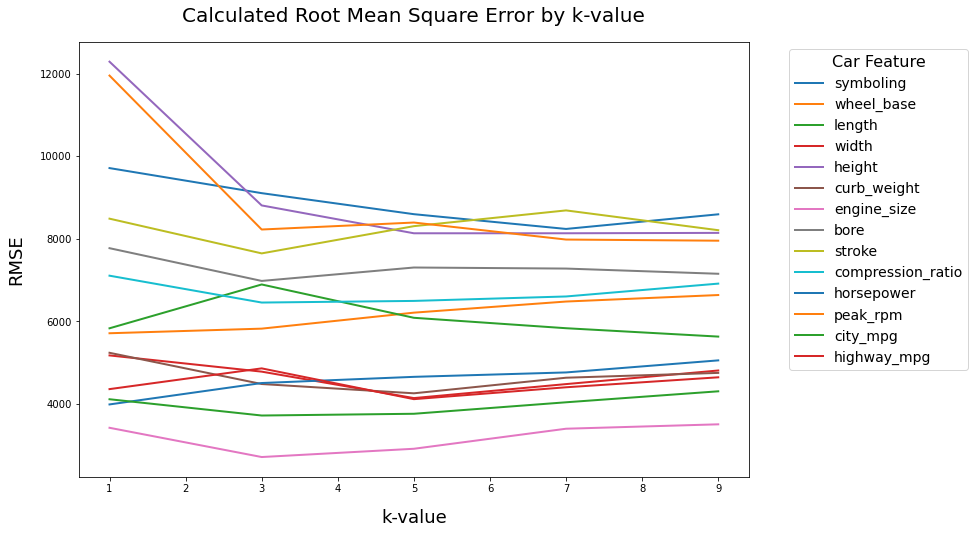

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.title('Calculated Root Mean Square Error by k-value', fontsize=20, pad=20)
    plt.plot(x,y, label=k, linewidth=2)
    plt.xlabel('k-value', fontsize=18, labelpad=15)
    plt.ylabel('RMSE', fontsize=18, labelpad=15)
    plt.legend(title='Car Feature', fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=16)
    

## Multivariate Model

In [9]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine_size          3189.583849
city_mpg             3986.670929
highway_mpg          4475.470081
horsepower           4592.308768
curb_weight          4671.710385
width                4676.530821
length               6054.364320
wheel_base           6171.881938
compression_ratio    6713.967874
bore                 7296.722479
stroke               8266.452114
symboling            8848.589647
peak_rpm             8900.858077
height               9101.167189
dtype: float64


In [10]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        normalized_cars
    )

k_rmse_results

{'2 best features': {5: 2975.502727831607},
 '3 best features': {5: 3111.4074261765636},
 '4 best features': {5: 2837.994560351259},
 '5 best features': {5: 3345.303765168419},
 '6 best features': {5: 2967.0961980950333}}

## Hyperparameter Tuning

In [11]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        normalized_cars
    )

k_rmse_results

{'2 best features': {1: 2891.707425265103,
  2: 2605.8339900795995,
  3: 2765.3142569723996,
  4: 2888.7497693323503,
  5: 2975.502727831607,
  6: 3043.792218031797,
  7: 3294.5289863209864,
  8: 3679.4401470959133,
  9: 3894.6527225438354,
  10: 4122.975027412446,
  11: 4144.784322980152,
  12: 4196.010812365184,
  13: 4286.63372116806,
  14: 4410.779498752773,
  15: 4454.6815473173,
  16: 4505.647774470881,
  17: 4603.851540252542,
  18: 4693.8966843035,
  19: 4828.133767886268,
  20: 4863.832306856267,
  21: 4953.897693425882,
  22: 5028.458015465638,
  23: 5066.851462275642,
  24: 5090.7975782957055},
 '3 best features': {1: 3183.815034998631,
  2: 2655.0903988455207,
  3: 2890.2987204244196,
  4: 3109.3700638570535,
  5: 3111.4074261765636,
  6: 3349.4324250569903,
  7: 3496.105365004649,
  8: 3649.521078227002,
  9: 3941.8796221478046,
  10: 4159.5920204590575,
  11: 4312.708207763813,
  12: 4365.379641458747,
  13: 4272.107064028093,
  14: 4305.954038170537,
  15: 4403.624971990

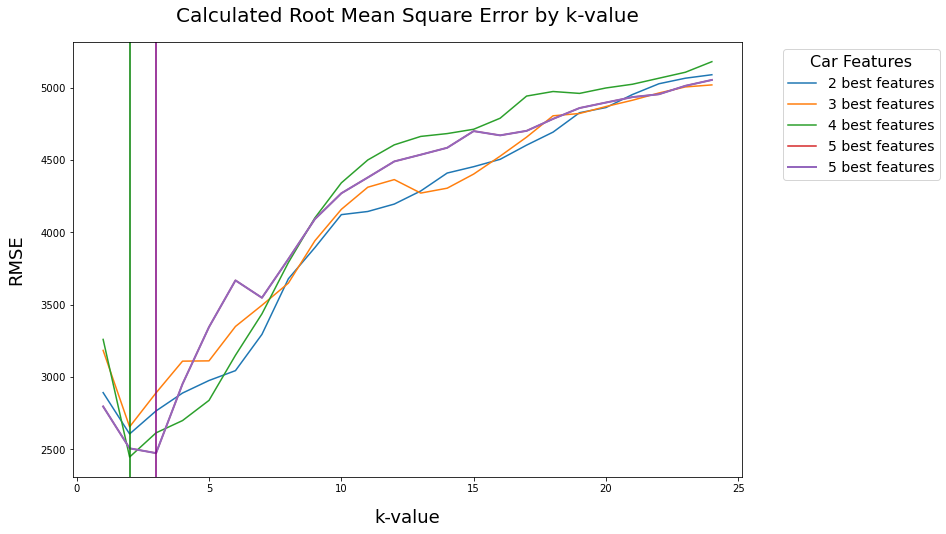

In [12]:
plt.figure(figsize=(12,8))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.title('Calculated Root Mean Square Error by k-value', fontsize=20, pad=20)
plt.plot(x,y, label=k, linewidth=2)
plt.xlabel('k-value', fontsize=18, labelpad=15)
plt.ylabel('RMSE', fontsize=18, labelpad=15)
plt.legend(title='Car Features', fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=16)
plt.axvline(x=3, ymin=0.0, ymax=1.0, color='purple')
plt.axvline(x=2, ymin=0.0, ymax=1.0, color='green')

## Conclusions

- Four best features with 2 k-values yielded lowest root mean square error value at 2446. 
- Five best features with 3 k-values yielded second lowest root mean square error value at 2473.

**Root Mean Square Error (RMSE)** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

K-nearest Neighbours (KNN) Regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

While the method is quite appealing, it quickly becomes impractical when the dimension increases, i.e., when there are many independent variables.

**In summary then, I really have no idea if an RMSE value of 2446 is a sign of great predictability.**

To me the KNN methodology of 'predicting' is very weak compared to Multiple Regression Analysis. With Multiple Regression Analysis, the outcome at least tells me what percentage of the total variablity of the target variable is explained by the chosen factors (variables) in the model. For example, an r-squared of 60% reveals that 60% of the data fit the regression model. I'm hoping that my subsequent lessons in machine learning will include multiple regression analysis in python.
